In [5]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy import integrate
import AnaUtils as au
import Triggered as tr
import glob
import os
from pylab import rcParams
from matplotlib.offsetbox import AnchoredText
from uncertainties import unumpy,ufloat
rcParams['figure.figsize'] = 15, 11
SMALL_SIZE = 22
MEDIUM_SIZE = 30
BIGGER_SIZE = 35
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
qe = 1.6022e-7

In [6]:
pmt = "KA0196"
wdir = '/global/cfs/cdirs/lz/users/heuerman/UmichData'
#wdir = '/global/cfs/cdirs/lz/users/lkorley/UMPMT/OCS_1369V'
fWaves = [os.path.splitext(iF)[0] for iF in glob.glob('{}/Gain/{}*/*.bin'.format(wdir,pmt))]
#fWaves = [os.path.splitext(iF)[0] for iF in glob.glob('{}/*.bin'.format(wdir))]
fWaves.sort() 
Gains = np.array([float(iF.split('/')[-1].split('V')[0].split('_')[-1]) for iF in fWaves])
#Gains = np.array([float(iF.split('/')[-1].split('.')[0].split('_')[-1]) for iF in fWaves])
#Gains *= np.array([float(iF.split('/')[-1].split('.')[0].split('_')[-2]) for iF in fWaves])
nGains = len(Gains)
print(Gains,fWaves,nGains)

[1300. 1300. 1300. 1300. 1400. 1400. 1400. 1400. 1480. 1480. 1480. 1500.
 1600. 1700. 1800.] ['/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1300V_2301122110/KA0196_OCS_1300V_2301122110_0', '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1300V_2301131752/KA0196_OCS_1300V_2301131752_0', '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1300V_2301131824/KA0196_OCS_1300V_2301131824_0', '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1300V_2301201708/KA0196_OCS_1300V_2301201708_0', '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1400V_2301121640/KA0196_OCS_1400V_2301121640_0', '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1400V_2301121650/KA0196_OCS_1400V_2301121650_0', '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1400V_2301131843/KA0196_OCS_1400V_2301131843_0', '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1400V_2301192006/KA0196_OCS_1400V_2301192006_0', '/global/c


-----------------------------------------
{'numEvents': 20000, 'numSamples': 250, 'chMap': array([1, 1]), 'numChan': 2, 'file': '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1300V_2301122110/KA0196_OCS_1300V_2301122110_0'}
118
Bias = 1300.0V
Fit Results: OrderedDict([('Q0', 0.09365036934519315), ('Q1', 2.205277059237925e-22), ('s0', 0.1724501397256684), ('s1', 0.27333022613572605), ('u', 1.3290843108222), ('Na', 0.992141877669528), ('chi2', Power_divergenceResult(statistic=7.161007709173074e+24, pvalue=0.0)), ('norm', 0.26879546911839164)])
Fit Errors (Square): OrderedDict([('Q0', 1.994680837646946e-05), ('Q1', 1.3577177719464766e-05), ('s0', 0.00011551587227338813), ('s1', 0.00011660303284592171), ('u', 0.020712246134798704), ('Na', 4.975526213277623e-05)])

-----------------------------------------
{'numEvents': 20000, 'numSamples': 250, 'chMap': array([1, 1]), 'numChan': 2, 'file': '/global/cfs/cdirs/lz/users/heuerman/UmichData/Gain/KA0196_OCS_1300V_2301131752/KA01

(array([1300., 1300., 1300., 1300., 1400., 1400., 1400., 1400., 1480.,
        1480., 1480., 1500., 1600., 1700., 1800.]),
 array([1.37640560e-15, 1.26980511e-17, 1.26498437e-17, 1.41274861e-29,
        1.48678292e+07, 1.28582945e+07, 1.82167870e+05, 5.77084296e+04,
        1.41527476e+07, 8.77251362e+06, 2.29574970e+06, 4.48142052e+06,
        1.26084715e+07, 2.64495537e+07, 4.54134770e+07]),
 array([2.29978917e+04, 2.25260164e+04, 2.39833744e+04, 1.28284180e+04,
        3.93702154e+07, 6.08524809e+06, 3.20044471e+04, 1.66337220e+04,
        1.75447276e+05, 2.24690615e+05, 2.08299959e+05, 1.46120612e+05,
        2.69139728e+05, 4.74609127e+05, 4.65187376e+05]))

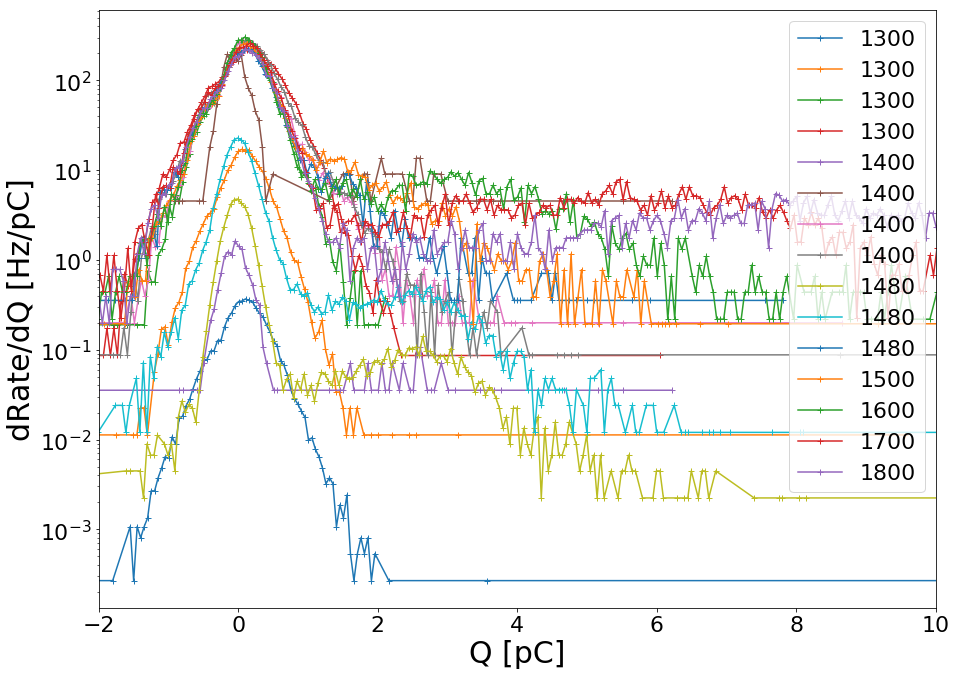

In [7]:
QSPE = np.array([0.]*nGains)
QErr = np.array([0.]*nGains)
QSig = np.array([0.]*nGains)
QSigE = np.array([0.]*nGains)
ExSPE = {'V':0, 'Gain':0,'u':1e6, 'QSPE': None,'Fit':None,'FitPars':None}
for iq in range(nGains):
    #plt.plot(QHists[iq][1],QHists[iq][2],marker='x',label=Gains[iq])
    print("\n-----------------------------------------")
    QHists = tr.extRunCh(fWaves[iq],30,4,8,pmt=1,qbins=100,qW=0.05,plot=False,ret=True)
    args = QHists[0][3]
    lst = 'solid'
    plt.plot(QHists[0][1][args],QHists[0][0][args],marker='+',label=int(Gains[iq]),linestyle=lst)
    try:
        P = {'Q0':0,'Q1':1.6,'s0':0.2,'s1':0.8,'u':1.5}
        GFit,GErr = tr.fitQP(QHists[0],P,doErr=True)#,3.2,0.1,1])
        QSPE[iq] = GFit['Q1']
        QSig[iq] = GFit['s1']
        QSigE[iq] = np.sqrt(GErr['s1'])
        print("Bias = {}V".format(Gains[iq]))
        print("Fit Results: {}".format(GFit))
        print("Fit Errors (Square): {}".format(GErr))
        QErr[iq] = np.sqrt(GErr['Q1'])
        '''
        if abs(GFit['u']-0.1)<abs(ExSPE['u']-0.1):
            ExSPE['V'] = Gains[iq]
            ExSPE['u'] = GFit['u']
            ExSPE['Gain'] = QSPE[iq]/qe
            ExSPE['QSPE'] = (QHists[iq][0][1][args],QHists[iq][0][0][args])
            minQ = min(QHists[iq][0][1][args])
            maxQ = max(QHists[iq][0][1][args])
            xVals = np.arange(minQ,maxQ,1e-3)
            ExSPE['Fit'] = xVals,GFit['norm']*tr.gpn2(xVals,50,*list(GFit.values())[:-2])
            ExSPE['FitPars'] = {r'$Q_0$':ufloat(GFit['Q0'],GErr['Q0']),
                                r'$Q_1$':ufloat(GFit['Q1'],GErr['Q1']),
                                r'$\sigma_0$':ufloat(GFit['s0'],GErr['s0']),
                                r'$\sigma_1$':ufloat(GFit['s1'],GErr['s1']),
                                r'$\lambda$':ufloat(GFit['u'],GErr['u']),
                                r'$\chi^2$':GFit['chi2'][0]
                                }
        '''
    except RuntimeError as e:
        print("Failed to fit {}V Run: {}".format(Gains[iq],e))
        lst = 'dashed'
        QSPE[iq] = np.nan
        QErr[iq] = np.nan
        #plt.plot(QHists[iq][1],QHists[iq][0],marker='x',label=Gains[iq])
#plt.yscale('log')
plt.xlim(-2,10)
plt.yscale('log')
plt.legend()
plt.xlabel('Q [pC]')
plt.ylabel('dRate/dQ [Hz/pC]')
plt.savefig("{}/figs/{}_GainSPEs.png".format(wdir,pmt))

Gains,QSPE/qe,QErr/qe

In [8]:
c0 = np.log(1e7)
def fit_gain_curve(v, v0, gamma):
    g = ( v / v0 )**gamma
    return g*1e7
def fit_gain_line(lnv,lnv0,gamma):
    g = gamma*(lnv - lnv0)
    return g+c0
from scipy.optimize import curve_fit
gainX = Gains
gainY = QSPE
gainErrs = np.log(QSPE/qe)*QErr/QSPE
print(gainX,gainY,gainErrs)
fitQ,fitErr = curve_fit(fit_gain_line,np.log(Gains),np.log(QSPE/qe),p0=[7,2],sigma=np.log(QSPE/qe)*QErr/QSPE,absolute_sigma=True)
fitErr = np.sqrt(np.diag(fitErr))
print(fitQ,fitErr)
fitErr[0] = np.exp(fitQ[0])*fitErr[0]/fitQ[0]
fitQ[0] = np.exp(fitQ[0])
print(fitQ,fitErr)
fitPar = unumpy.uarray(fitQ,fitErr)
print(fitPar)

"""
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(Gains,np.log(QSPE/qe))
print(slope, intercept, std_err,(np.log(1e7)-intercept)/slope)
"""


[1300. 1300. 1300. 1300. 1400. 1400. 1400. 1400. 1480. 1480. 1480. 1500.
 1600. 1700. 1800.] [2.20527706e-22 2.03448174e-24 2.02675796e-24 2.26350582e-36
 2.38212359e+00 2.06015594e+00 2.91869361e-02 9.24604459e-03
 2.26755322e+00 1.40553213e+00 3.67825017e-01 7.18013196e-01
 2.02012931e+00 4.23774750e+00 7.27614728e+00] [-5.71758625e+20 -6.90166179e+22 -7.37690063e+22 -6.03210291e+34
  4.37311793e+01  7.74694238e+00  2.12803582e+00  3.15999122e+00
  2.04116759e-01  4.09478869e-01  1.32892533e+00  4.99373581e-01
  3.49003613e-01  3.06675339e-01  1.80604257e-01]
[7.30048323 7.50681283] [0.02153905 1.2466568 ]
[1481.01543127    7.50681283] [4.36952778 1.2466568 ]
[1481.015431272207+/-4.369527784360676
 7.50681283233376+/-1.246656802572035]


'\nfrom scipy.stats import linregress\nslope, intercept, r_value, p_value, std_err = linregress(Gains,np.log(QSPE/qe))\nprint(slope, intercept, std_err,(np.log(1e7)-intercept)/slope)\n'

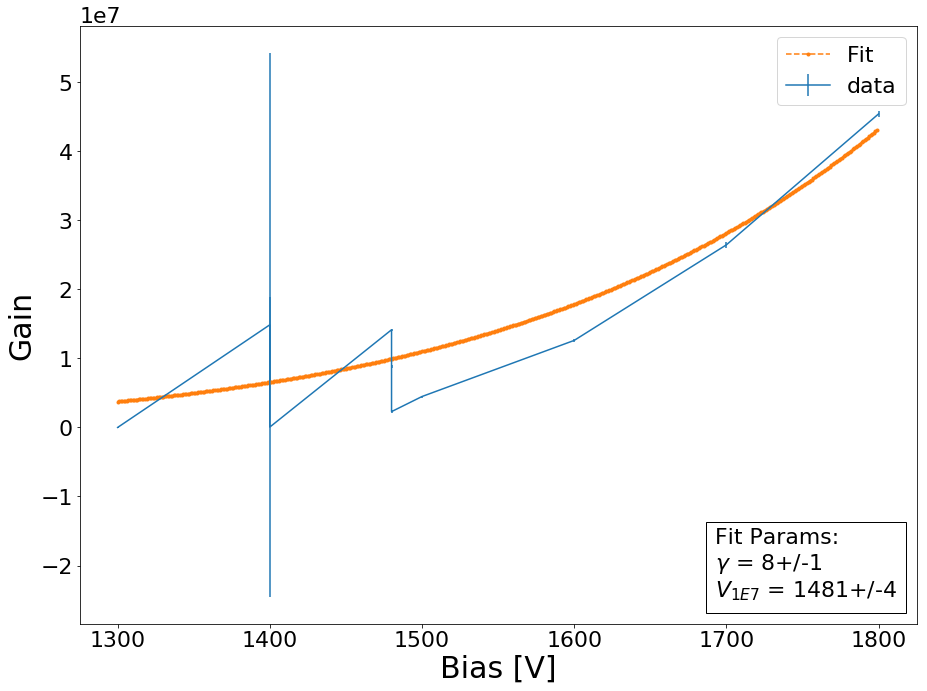

In [9]:
rcParams['figure.figsize'] = 15, 11
SMALL_SIZE = 22
MEDIUM_SIZE = 30
BIGGER_SIZE = 35
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
minV = min(Gains)
maxV = max(Gains)
xV = np.arange(minV,maxV,1)
points = fit_gain_curve(xV,fitQ[0],fitQ[1])
#pointerr = np.sqrt(np.square(fitErr[1]/fitQ[1])+np.square(fitErr[0]/fitQ[0]))*points
plt.errorbar(Gains,QSPE/qe,label='data',yerr = QErr/qe)
plt.plot(xV,points,label='Fit',marker='.',linestyle='dashed')
#plt.yscale('log')
#plt.xlim(-2,10)
plt.xlabel('Bias [V]')
plt.ylabel('Gain')
plt.legend()
spar = [r'$\gamma$ = {:.1u}'.format(fitPar[1]),r'$V_{1E7}$'+' = {:.1u}'.format(fitPar[0])]
anctxt = AnchoredText('Fit Params:\n'+'\n'.join(np.array(spar)), loc=4)
plt.gca().add_artist(anctxt)
plt.savefig("{}/figs/{}_GainCurve.png".format(wdir,pmt))
plt.show()